### SOK-1003 Python lab <br> <br> Semesteroppgave/prosjekt <br><br> Kandidatnummer: 66

#### 1. Innledning

I faget SOK-1004 lærte vi om hvordan Lorenz-kurve og Gini-koeffisient brukes som mål for
ulikhet i inntektsfordelingen i et land. Dette er et viktig tema innen samfunnsøkonomi og
målet for prosjektet er å lage en funksjon som henter inntektstall fra SSB gjennom API kall,
bearbeider og klargjør datasettet til analyse, finner Lorenz-kurven, plotter den og finner
Gini-koeffisienten i en sveip ved hjelp av Python programmering. 

#### 2. Litteraturgjennomgang

Som nevnt er inntektsfordeling et viktig tema i diskusjonen om økonomisk politikk. [Meld. St. 1: Nasjonalbudsjettet 2021](https://www.regjeringen.no/contentassets/53adf7ea24b54e4a961005443231fd08/no/pdfs/stm202020210001000dddpdfs.pdf) og [Meld St 13 (2018-2019)](https://www.regjeringen.no/contentassets/472d31ff815d4ce7909f5593bf7d79b8/no/pdfs/stm201820190013000dddpdfs.pdf) forklarer viktigheten av og prinsippene bak Lorenz-kurve og Gini-koeffisient. For eksempel viser figur 2.12 i Meld. St. 1: Nasjonalbudsjettet 2021 utviklingen av inntektsfordelingen i Norge fra 1995. Figur 2.5 i Meld St 13 (2018-2019) gir et bilde på inntektsulikheten i Norge sammenliknet med andre land. 
Boks 2.4 i Meld St 13 (2018-2019) forteller om Gini-koeffisienten som mål på ulikhet og viser Lorenz-kurve for Norge for året 2016:

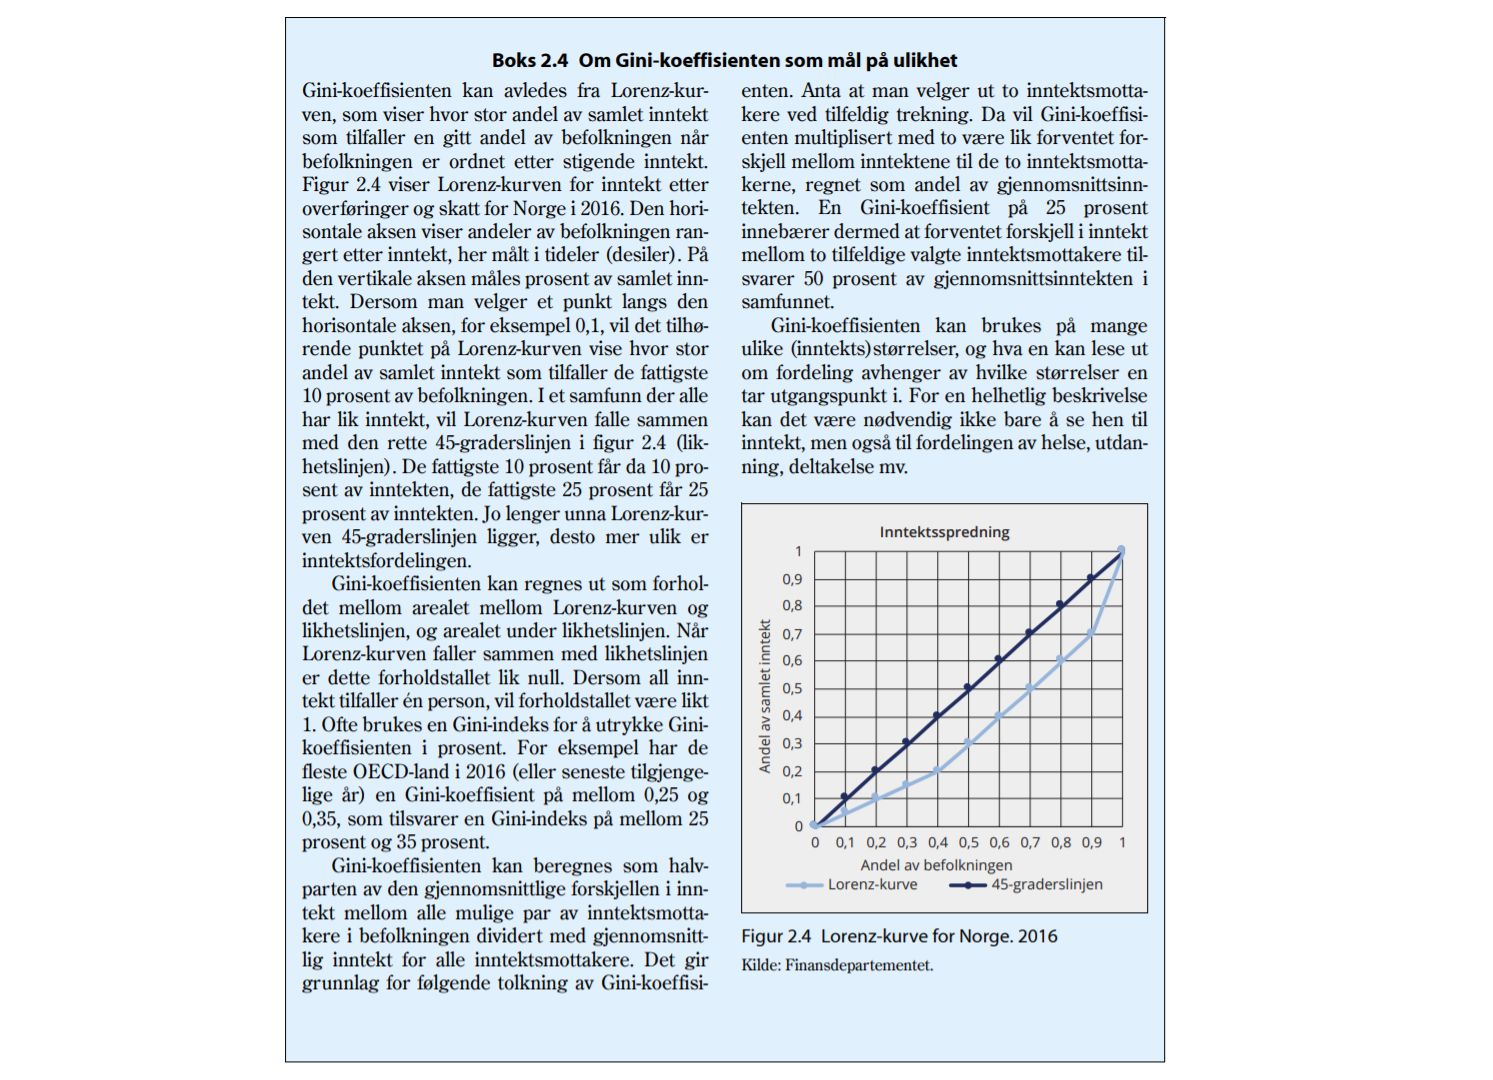

#### 3. Teori

Fremgangsmåten for beregning av Gini-koeffisient og Lorenz-kurve samt hvilke data en trenger er forklart i boks 2.4. Lorenz-kurve viser fordelingen av ressurser i en graf der X-aksen viser andeler av befolkningen 
rangert etter inntekt fra laveste til høyeste verdi og Y-aksen viser andeler av total 
samlet inntekt. Lorenz-kurven for Norge for året 2016 indikerer at de 30% inntektsmottakerne med minst inntekt fikk 15% av samlet, total inntekt. Hvilke inntektsdata en benytter vil i stor grad være avhengig av hvilke spørsmål en ønsker å belyse og hvilke inntektsdata som er tilgjengelig  (Anonym, 2021). 
For eksempel er disponibel inntekt per husholdning ofte lagt til grunn for analyser av 
inntektsfordeling hvis formålet med analysen er å vurdere de enkelte medlemmenes økonomiske 
situasjon, men dette er ingen regel. Inntektsfordelingen kan 
være basert på geografiske områder. Uavhengig av hvilke data en benytter, organiseres de slik at 
de definerer den kumulative fordelingen av inntektene og den kumulative fordelingen av 
inntektsmottakere. Figuren nedenfor er hentet fra [Core kapittel 5.12 - Measuring economic inequality](https://www.core-econ.org/the-economy/book/text/05.html#512-measuring-economic-inequality):

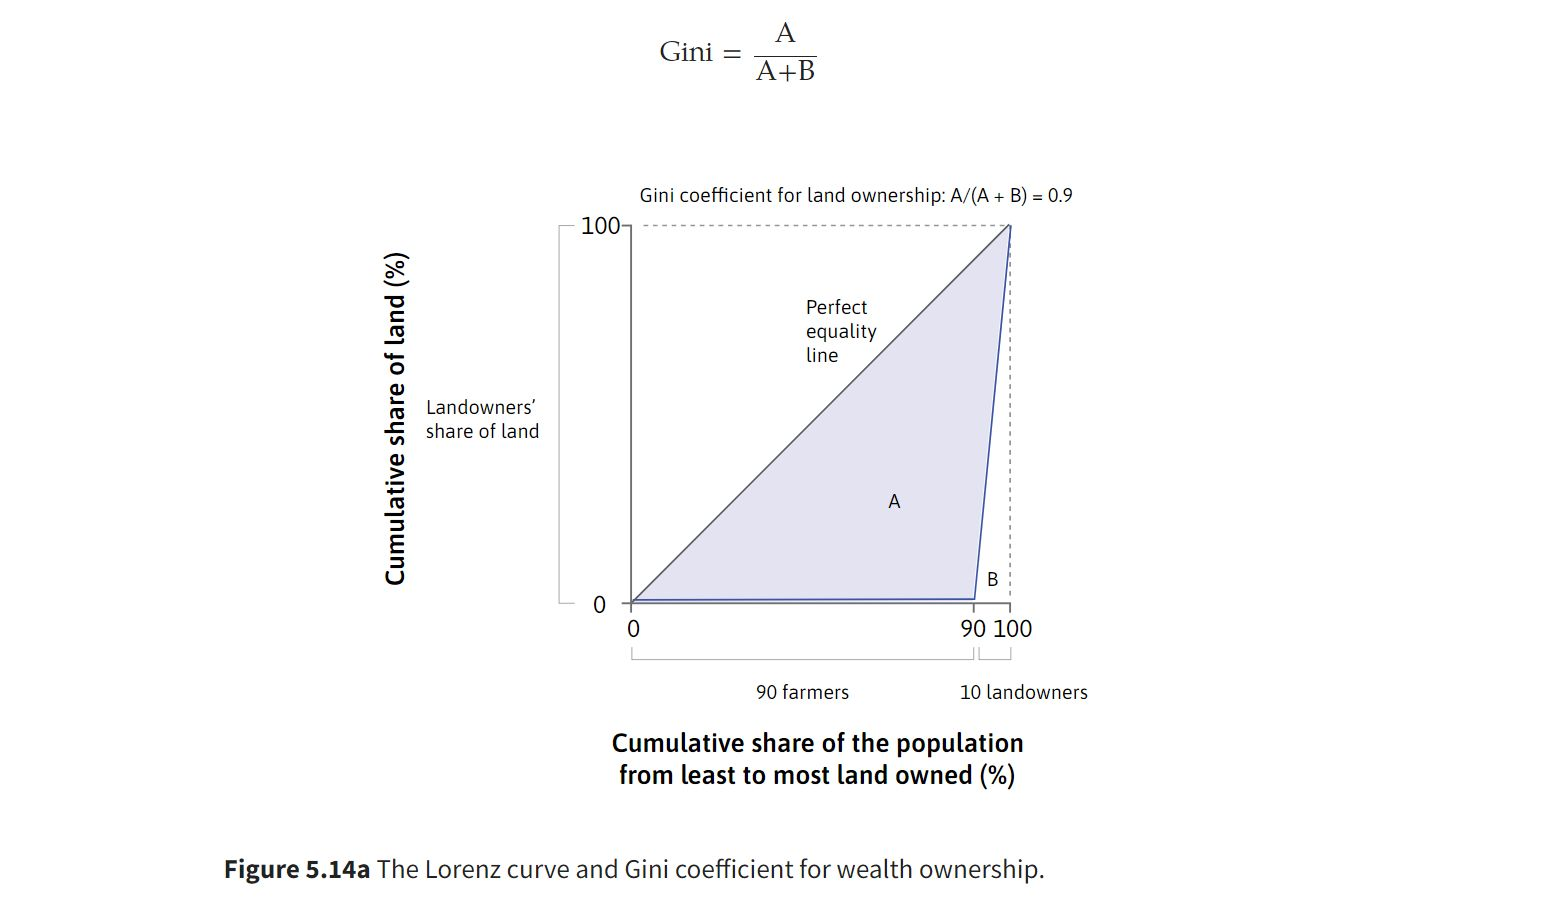

Gini-indeksen uttrykker Gini-koeffisienten i prosent og kan regnes ut ved å ta arealet mellom Lorenz-kurven og likhetslinjen A og dividere det på arealet under likhetslinjen B (Core, 2017). Jo høyere Gini-koeffisient, desto større ulikhet. En Gini-koeffisient på 0 (Gini-indeks på 0 prosent) angir perfekt likhet og betyr at alle inntektsmottakere har like mye inntekt mens en Gini-koeffisient på 1 (Gini-indeks på 100 prosent) angir perfekt ulikhet og betyr at all inntekt tilfaller én enkelt inntektsmottaker. Hvilken inntektsstørrelse en tar utgangspunkt i vil være avgjørende for hvordan Gini-koeffisienten tolkes.  

#### 4. Analyse

#### 4.1. Installerer og importerer nødvendige pakker

Jeg benytter biblioteket pyjstat for å hente tall fra SSB:

In [1]:
# Fjern hashtaggen og kjør koden for å installere pyjstat:
# pip install pyjstat
# !pip install pyjstat
# conda install --channel conda-forge pyjstat

Importerer nødvendige pakker:

In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pyjstat import pyjstat
import requests
import warnings
warnings.filterwarnings("ignore")

#### 4.2. Henter inntektstall fra SSB

[SSB sin nettside](https://www.ssb.no/api/pxwebapi/api-eksempler-pa-kode/post-api-sporring-med-json-stat-og-fa-pandas-dataframe-i-retur) forklarer fremgangsmåten for importering av datasett gjennom deres API. <br> 

Jeg følger oppskriften nedenfor og leser inn vilkårlige inntektstall fra SSB:

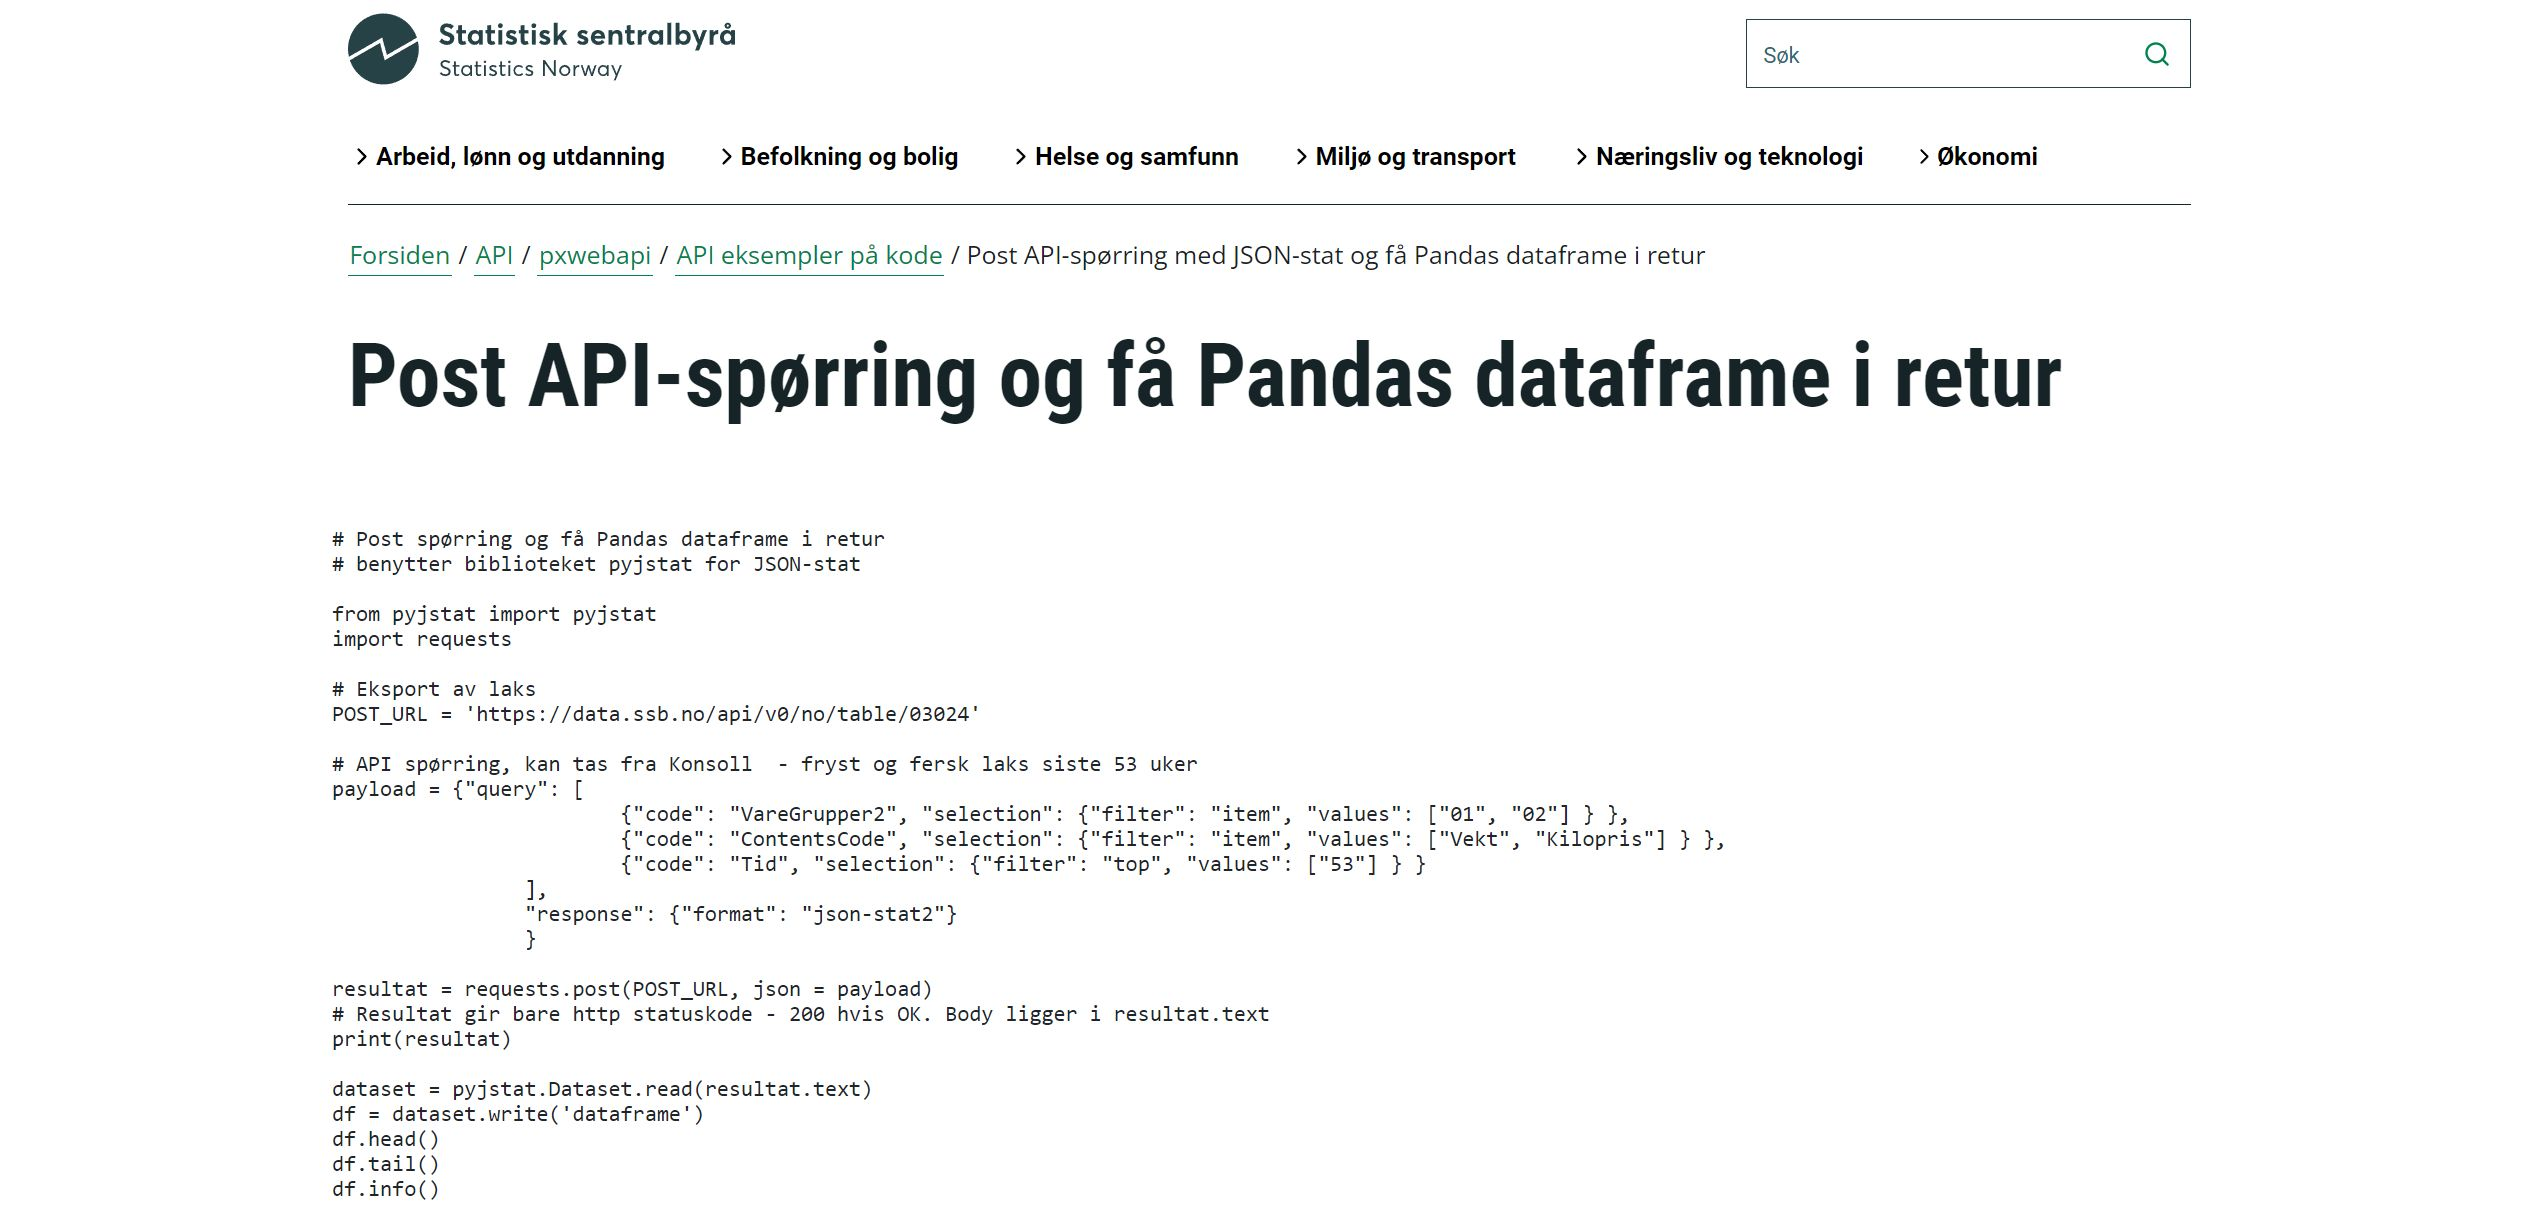

Mitt datasett inneholder inntekt etter skatt i kroner for alle norske kommuner for året 2017 for alle husholdninger. <br> 

- 12558: Husholdninger, etter region, desil, statistikkvariabel, år og inntekt før/etter skatt <br>
- Høyeste verdi i desil (kr) <br>
- Inntekt etter skatt <br>
- 2017 <br>
- Alle kommuner <br>
- Alle desi

Lenke til tabellen: https://www.ssb.no/statbank/table/12558/

Jeg finner URL-adressen og kildekoden til mitt datasett under "API-spørring for denne tabellen": <br> 

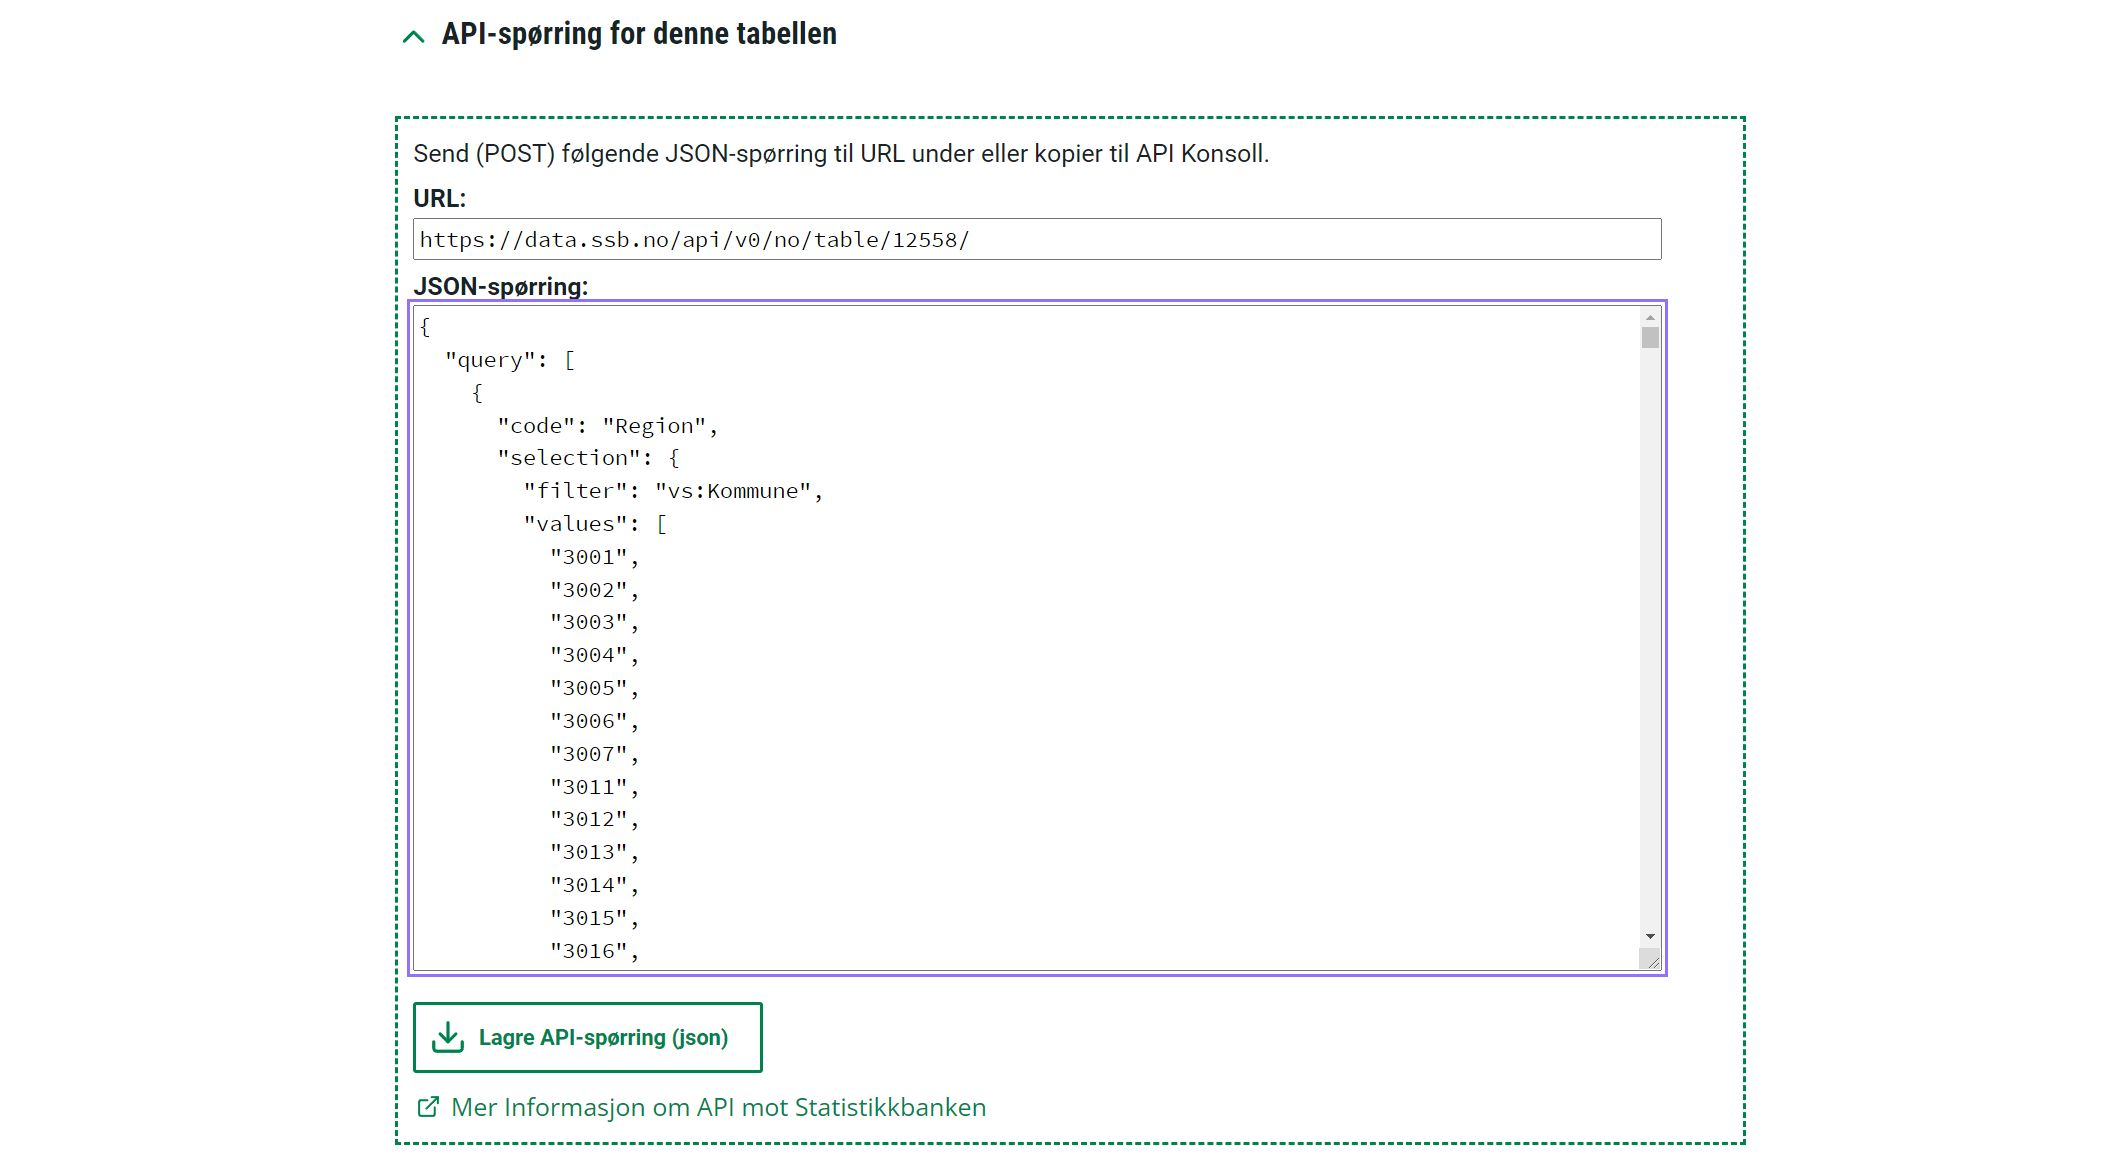

Kopierer og limer inn i min Jupyter notatbok:

In [469]:
SSB_URL = "https://data.ssb.no/api/v0/no/table/12558/"

SSB_QUERY = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Kommune",
        "values": [
          "3001",          "3002",          "3003",          "3004",          "3005",          "3006",          "3007",          "3011",
          "3012",          "3013",          "3014",          "3015",          "3016",          "3017",          "3018",          "3019",
          "3020",          "3021",          "3022",          "3023",          "3024",          "3025",          "3026",          "3027",
          "3028",          "3029",          "3030",          "3031",          "3032",          "3033",          "3034",          "3035",
          "3036",          "3037",          "3038",          "3039",          "3040",          "3041",          "3042",          "3043",
          "3044",          "3045",          "3046",          "3047",          "3048",          "3049",          "3050",          "3051",
          "3052",          "3053",          "3054",          "0101",          "0102",          "0103",          "0104",          "0105",
          "0106",          "0111",          "0113",          "0114",          "0115",          "0116",          "0117",          "0118",
          "0119",          "0121",          "0122",          "0123",          "0124",          "0125",          "0127",          "0128",
          "0130",          "0131",          "0133",          "0134",          "0135",          "0136",          "0137",          "0138",
          "0199",          "0211",          "0213",          "0214",          "0215",          "0216",          "0217",          "0219",
          "0220",          "0221",          "0226",          "0227",          "0228",          "0229",          "0230",          "0231",
          "0233",          "0234",          "0235",          "0236",          "0237",          "0238",          "0239",          "0299",
          "0601",          "0602",          "0604",          "0605",          "0612",          "0615",          "0616",          "0617",
          "0618",          "0619",          "0620",          "0621",          "0622",          "0623",          "0624",          "0625",
          "0626",          "0627",          "0628",          "0631",          "0632",          "0633",          "0699",          "0301",
          "0399",          "3401",          "3403",          "3405",          "3407",          "3411",          "3412",          "3413",
          "3414",          "3415",          "3416",          "3417",          "3418",          "3419",          "3420",          "3421",
          "3422",          "3423",          "3424",          "3425",          "3426",          "3427",          "3428",          "3429",
          "3430",          "3431",          "3432",          "3433",          "3434",          "3435",          "3436",          "3437",
          "3438",          "3439",          "3440",          "3441",          "3442",          "3443",          "3446",          "3447",
          "3448",          "3449",          "3450",          "3451",          "3452",          "3453",          "3454",          "0401",
          "0402",          "0403",          "0412",          "0414",          "0415",          "0417",          "0418",          "0419",
          "0420",          "0423",          "0425",          "0426",          "0427",          "0428",          "0429",          "0430",
          "0432",          "0434",          "0435",          "0436",          "0437",          "0438",          "0439",          "0441",
          "0499",          "0501",          "0502",          "0511",          "0512",          "0513",          "0514",          "0515",
          "0516",          "0517",          "0518",          "0519",          "0520",          "0521",          "0522",          "0528",
          "0529",          "0532",          "0533",          "0534",          "0536",          "0538",          "0540",          "0541",
          "0542",          "0543",          "0544",          "0545",          "0599",          "3801",          "3802",          "3803",
          "3804",          "3805",          "3806",          "3807",          "3808",          "3811",          "3812",          "3813",
          "3814",          "3815",          "3816",          "3817",          "3818",          "3819",          "3820",          "3821",
          "3822",          "3823",          "3824",          "3825",          "0701",          "0702",          "0703",          "0704",
          "0705",          "0706",          "0707",          "0708",          "0709",          "0710",          "0711",          "0712",
          "0713",          "0714",          "0715",          "0716",          "0716u",          "0717",          "0718",          "0719",
          "0720",          "0721",          "0722",          "0723",          "0724",          "0725",          "0726",          "0727",
          "0728",          "0729",          "0799",          "0805",          "0806",          "0807",          "0811",          "0814",
          "0815",          "0817",          "0819",          "0821",          "0822",          "0826",          "0827",          "0828",
          "0829",          "0830",          "0831",          "0833",          "0834",          "0899",          "4201",          "4202",
          "4203",          "4204",          "4205",          "4206",          "4207",          "4211",          "4212",          "4213",
          "4214",          "4215",          "4216",          "4217",          "4218",          "4219",          "4220",          "4221",
          "4222",          "4223",          "4224",          "4225",          "4226",          "4227",          "4228",          "0901",
          "0903",          "0904",          "0906",          "0911",          "0912",          "0914",          "0918",          "0919",
          "0920",          "0921",          "0922",          "0923",          "0924",          "0926",          "0928",          "0929",
          "0932",          "0933",          "0935",          "0937",          "0938",          "0940",          "0941",          "0999",
          "1001",          "1002",          "1003",          "1004",          "1014",          "1017",          "1018",          "1021",
          "1026",          "1027",          "1029",          "1032",          "1034",          "1037",          "1046",          "1099",
          "1101",          "1102",          "1103",          "1106",          "1108",          "1111",          "1112",          "1114",
          "1119",          "1120",          "1121",          "1122",          "1124",          "1127",          "1129",          "1130",
          "1133",          "1134",          "1135",          "1141",          "1142",          "1144",          "1145",          "1146",
          "1149",          "1151",          "1154",          "1159",          "1160",          "1199",          "4601",          "4602",
          "4611",          "4612",          "4613",          "4614",          "4615",          "4616",          "4617",          "4618",
          "4619",          "4620",          "4621",          "4622",          "4623",          "4624",          "4625",          "4626",
          "4627",          "4628",          "4629",          "4630",          "4631",          "4632",          "4633",          "4634",
          "4635",          "4636",          "4637",          "4638",          "4639",          "4640",          "4641",          "4642",
          "4643",          "4644",          "4645",          "4646",          "4647",          "4648",          "4649",          "4650",
          "4651",          "1201",          "1211",          "1214",          "1216",          "1219",          "1221",          "1222",
          "1223",          "1224",          "1227",          "1228",          "1230",          "1231",          "1232",          "1233",
          "1234",          "1235",          "1238",          "1241",          "1242",          "1243",          "1244",          "1245",
          "1246",          "1247",          "1248",          "1249",          "1250",          "1251",          "1252",          "1253",
          "1255",          "1256",          "1259",          "1260",          "1263",          "1264",          "1265",          "1266",
          "1299",          "1301",          "1401",          "1411",          "1412",          "1413",          "1416",          "1417",
          "1418",          "1419",          "1420",          "1421",          "1422",          "1424",          "1426",          "1428",
          "1429",          "1430",          "1431",          "1432",          "1433",          "1438",          "1439",          "1441",
          "1443",          "1444",          "1445",          "1448",          "1449",          "1499",          "1501",          "1502",
          "1503",          "1504",          "1505",          "1506",          "1507",          "1511",          "1514",          "1515",
          "1516",          "1517",          "1519",          "1520",          "1523",          "1524",          "1525",          "1526",
          "1527",          "1528",          "1529",          "1531",          "1532",          "1534",          "1535",          "1539",
          "1543",          "1545",          "1546",          "1547",          "1548",          "1551",          "1554",          "1556",
          "1557",          "1560",          "1563",          "1566",          "1567",          "1569",          "1571",          "1572",
          "1573",          "1576",          "1577",          "1578",          "1579",          "1599",          "5001",          "5004",
          "5005",          "5006",          "5007",          "5011",          "5012",          "5013",          "5014",          "5015",
          "5016",          "5017",          "5018",          "5019",          "5020",          "5021",          "5022",          "5023",
          "5024",          "5025",          "5026",          "5027",          "5028",          "5029",          "5030",          "5031",
          "5032",          "5033",          "5034",          "5035",          "5036",          "5037",          "5038",          "5039",
          "5040",          "5041",          "5042",          "5043",          "5044",          "5045",          "5046",          "5047",
          "5048",          "5049",          "5050",          "5051",          "5052",          "5053",          "5054",          "5055",
          "5056",          "5057",          "5058",          "5059",          "5060",          "5061",          "1601",          "1612",
          "1613",          "1617",          "1620",          "1621",          "1622",          "1624",          "1627",          "1630",
          "1632",          "1633",          "1634",          "1635",          "1636",          "1638",          "1640",          "1644",
          "1645",          "1648",          "1653",          "1657",          "1662",          "1663",          "1664",          "1665",
          "1699",          "1702",          "1703",          "1711",          "1714",          "1717",          "1718",          "1719",
          "1721",          "1723",          "1724",          "1725",          "1729",          "1736",          "1738",          "1739",
          "1740",          "1742",          "1743",          "1744",          "1748",          "1749",          "1750",          "1751",
          "1755",          "1756",          "1799",          "1804",          "1805",          "1806",          "1811",          "1812",
          "1813",          "1814",          "1815",          "1816",          "1818",          "1820",          "1822",          "1824",
          "1825",          "1826",          "1827",          "1828",          "1832",          "1833",          "1834",          "1835",
          "1836",          "1837",          "1838",          "1839",          "1840",          "1841",          "1842",          "1843",
          "1845",          "1848",          "1849",          "1850",          "1851",          "1852",          "1853",          "1854",
          "1855",          "1856",          "1857",          "1858",          "1859",          "1860",          "1865",          "1866",
          "1867",          "1868",          "1870",          "1871",          "1874",          "1875",          "1899",          "5401",
          "5402",          "5403",          "5404",          "5405",          "5406",          "5411",          "5412",          "5413",
          "5414",          "5415",          "5416",          "5417",          "5418",          "5419",          "5420",          "5421",
          "5422",          "5423",          "5424",          "5425",          "5426",          "5427",          "5428",          "5429",
          "5430",          "5432",          "5433",          "5434",          "5435",          "5436",          "5437",          "5438",
          "5439",          "5440",          "5441",          "5442",          "5443",          "5444",          "1901",          "1902",
          "1903",          "1911",          "1913",          "1915",          "1917",          "1919",          "1920",          "1921",
          "1922",          "1923",          "1924",          "1925",          "1926",          "1927",          "1928",          "1929",
          "1931",          "1933",          "1936",          "1938",          "1939",          "1940",          "1941",          "1942",
          "1943",          "1999",          "2001",          "2002",          "2003",          "2004",          "2011",          "2012",
          "2014",          "2015",          "2016",          "2017",          "2018",          "2019",          "2020",          "2021",
          "2022",          "2023",          "2024",          "2025",          "2027",          "2028",          "2030",          "2099",
          "2111",          "2112",          "2115",          "2121",          "2131",          "2199",          "2211",          "2299",
          "2300",          "2311",          "2321",          "2399",          "2599",          "9999"
        ]
      }
    },
    {
      "code": "InntektSkatt",
      "selection": {
        "filter": "item",
        "values": [
          "00S"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "VerdiDesil"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2017"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

Jeg følger oppskriften fra SSB og får pandas dataframe i retur:

In [470]:
resultat = requests.post(SSB_URL, json = SSB_QUERY)
dataset = pyjstat.Dataset.read(resultat.text)
df = dataset.write('dataframe')

#### 4.3 Deskriptiv analyse

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8220 entries, 0 to 8219
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   region                   8220 non-null   object 
 1   inntekt før/etter skatt  8220 non-null   object 
 2   desil                    8220 non-null   object 
 3   statistikkvariabel       8220 non-null   object 
 4   år                       8220 non-null   object 
 5   value                    7794 non-null   float64
dtypes: float64(1), object(5)
memory usage: 385.4+ KB


In [472]:
df.isna().sum()

region                       0
inntekt før/etter skatt      0
desil                        0
statistikkvariabel           0
år                           0
value                      426
dtype: int64

In [473]:
len(df['region'].unique())

822

Jeg ser at datasettet inneholder 8220 observasjoner.
Kolonnen "value" inneholder inntektstall og har 7794 gyldige observasjoner. Videre er det 822 unike kommuner (8220 / 10 desil).
Fra 2020 er det 356 kommuner i Norge etter at Stortinget vedtok å redusere antall kommuner fra 426.
Mitt datasett inneholder inntektstall for året 2017 og skal inneholde 426 unike kommuner. Jeg legger også merke til formateringen av variabler under "Dtype". 

In [474]:
df.tail()

,region,inntekt før/etter skatt,desil,statistikkvariabel,år,value
8215,Uoppgitt kommune,Inntekt etter skatt,Desil 6,Høyeste verdi i desil (kr),2017,0.0
8216,Uoppgitt kommune,Inntekt etter skatt,Desil 7,Høyeste verdi i desil (kr),2017,0.0
8217,Uoppgitt kommune,Inntekt etter skatt,Desil 8,Høyeste verdi i desil (kr),2017,0.0
8218,Uoppgitt kommune,Inntekt etter skatt,Desil 9,Høyeste verdi i desil (kr),2017,0.0
8219,Uoppgitt kommune,Inntekt etter skatt,Desil 10,Høyeste verdi i desil (kr),2017,0.0


In [475]:
len(df[df['region'] == 'Uoppgitt kommune'])

10

Det er behov å rense datasettet for manglende og feilaktige oppføringer som kan påvirke mitt resultat. <br> For eksempel er det 10 observasjoner for "uoppgitt kommune" der inntekt er lik null for alle desil. 

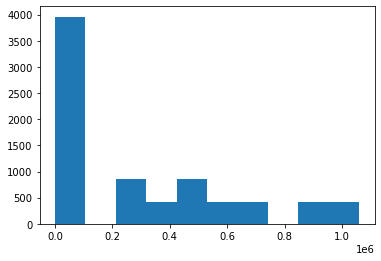

In [476]:
plt.hist(df['value'])
plt.show() 

In [477]:
len(df[df['value'] == 0])

3960

Jeg ser nærmere på variabelen "value" (inntekt). Av de 7794 gyldige observasjonene er omtrent halvparten lik null. 

In [478]:
pd.set_option('display.float_format', str) # fra "scientific notation" til float

df.describe()

,value
count,7794.0
mean,275364.12625096226
std,335656.9333082982
min,0.0
25%,0.0
50%,0.0
75%,510000.0
max,1060000.0


In [479]:
df[df['value'] < 0]

,region,inntekt før/etter skatt,desil,statistikkvariabel,år,value


In [480]:
df['value'].min()

0.0

Ettersom variabelen ikke innholder negative tall er det kun behov å fjerne tall som er lik null.

#### 4.4. Datarensing

Bearbeider datasettet og gjør det klart til analyse:

In [481]:
# Datasettet inneholder 6 kolonner (variables/features/dimensions) 
# Jeg trenger kun 2: region og value (inntekt). Jeg tar med "desil" som bonus.
df = df[['region','desil','value']] 

# Skifter navn på alle kolonner:
df = df.rename(columns={'region': 'Kommune', 'desil': 'Desil', 'value': 'Inntekt'})

# Fjerner alle tomme celler / manglende verdier:
# Noen datasett fra SSB inneholder nulltall i tillegg til "NaN" 
# "0.0" regnes som gyldig observasjon, 
# men samtlige innbyggere i en kommune kan umulig ha null inntekt
df['Inntekt'] = df['Inntekt'].replace(0, np.nan) 
df = df.dropna()

# Angir hvilken datatype variablene bør være av:
# Konverterer til ønsket datatype
# int() konverterer til heltall
# str() konverterer til tekststreng
df = df.astype({'Inntekt':int,'Kommune':str})

df

,Kommune,Desil,Inntekt
510,Halden (-2019),Desil 1,219000
511,Halden (-2019),Desil 2,279000
512,Halden (-2019),Desil 3,350000
513,Halden (-2019),Desil 4,426000
514,Halden (-2019),Desil 5,510000
...,...,...,...
8064,Sør-Varanger (-2019),Desil 5,510000
8065,Sør-Varanger (-2019),Desil 6,611000
8066,Sør-Varanger (-2019),Desil 7,726000
8067,Sør-Varanger (-2019),Desil 8,857000


In [482]:
len(df['Kommune'].unique())

426

Datasettet inneholder nå inntektstall for 426 kommuner. Ideelt sett bør en gå igjennom alle observasjoner manuelt og sørge for at inputen til funksjonen er korrekt. Siden formålet med dette prosjektet er å lage en funksjon som henter inn datamateriale og fremstiller det grafisk, har jeg valgt å ignorere betydningen av årstallet i observasjoner som "Halden (-2019)" og hva det kan bety for tolkningen av mine resultater. Jeg har dobbeltsjekket at året 2017 er valgt som kriterie under mitt API kall mot SSB. Jeg antar at databasen fungerer som den skal og at datasettet er representativt for året 2017.


In [483]:
# Fjerner årstall fra observasjoner ved hjelp av "lambda" og kommandoer "apply" og "split":
df['Kommune'] = df['Kommune'].apply(lambda x:x.split('(')[0])

# "lambda" indikerer en "anonym" funksjon uten binding som heller ikke trenger et navn
# Funksjonen sier "for hver observasjon i kolonnen 'Kommune', del opp teksten i to deler,  
# før og etter '(' og returner det som kommer før '('". 
# [0] returnerer det første elementet, [1] det andre
# kommandoen "split" skiller data i henhold til ovennevnte kriterier
# apply tar en funksjon og bruker den på hvert element i kolonnen

df.tail()

,Kommune,Desil,Inntekt
8064,Sør-Varanger,Desil 5,510000
8065,Sør-Varanger,Desil 6,611000
8066,Sør-Varanger,Desil 7,726000
8067,Sør-Varanger,Desil 8,857000
8068,Sør-Varanger,Desil 9,1060000


#### 4.5. Lorenz-kurve og Gini

Jeg finner Lorenz-kurven og plotter den.

Den kumulative andelen av befolkningen (X-aksen) er utledet ved å dividere det kumulative antallet 
kommuner på det totale antallet kommuner i datasettet. Videre er inntektene sortert fra laveste til 
høyeste verdi og dividert på den totale inntekten for alle kommuner. Den kumulative summen av 
kvotienter gir den kumulative fordelingen av inntektene (Y-aksen). 

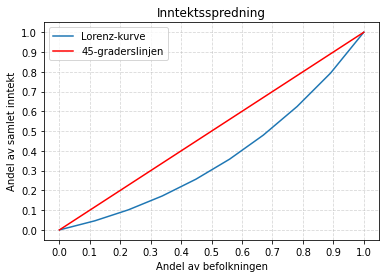

In [485]:
# følgende kommando returnerer antallet observasjoner (422):
n = len(df) 

# Finner andel av befolkningen, 1/422, 2/422, 3/422... osv (X-verdien):
andel_av_befolkningen = np.arange(1, n+1) / n 

# Sorterer inntekter i stigende rekkefølge:
inntekter = df['Inntekt'].sort_values() 

# Forrige variabel delt på summen av alle inntekter:
andel_av_samlet_inntekt = inntekter / inntekter.sum() 

# Her beregnes en kumulativ sum av inntektene (Y-verdien):
kumulativ_andel = andel_av_samlet_inntekt.cumsum() 

# Lager et plot av Lorenzkurven og inntektslikhetslinjen: 
f,ax = plt.subplots() 
ax.plot(andel_av_befolkningen,kumulativ_andel, label='Lorenz-kurve')
ax.plot((0,1), (0,1), color='r',label='45-graderslinjen')
ax.set_title("Inntektsspredning")
ax.set_xlabel('Andel av befolkningen')
ax.set_ylabel('Andel av samlet inntekt')
ax.grid(alpha=0.5, linestyle='--')
ax.xaxis.set_major_locator(plt.MaxNLocator(12))
ax.yaxis.set_major_locator(plt.MaxNLocator(12))
ax.legend()
plt.show()

Denne figuren er modellert etter figur 2.4 i Meld St 13 (2018-2019).

Jeg finner Gini-koeffisienten:

In [486]:
# Bruker kumulativ_andel fra tidligere og konverterer den fra pandas serie til numpy-array
# Det er en rekke fordeler knyttet til bruk av numpy-arrays
# Store regneoperasjoner går mye fortere, vi kan bruke desimaltall i steglengden 
# og regne ledd for ledd direkte med hele arrays. Hvis vi lagrer tallene i en liste 
# må vi la en løkke løpe gjennom lista for å gjøre regneoperasjoner på tallene 
# Når vi lagrer tallene i en numpy-array, kan vi regne på alle tall samtidig
kumulativ_andel_array = np.array(kumulativ_andel,dtype=np.float64)

# summerer 'i' og 'i+1' ([i:i+2] her), altså parvis addisjon av alle elementer i "range" fra 0 til 422:
# dette er en "for-løkke" med "list comprehension" for å spare plass og tid
parvis_addisjon = [sum(kumulativ_andel_array[i:i+2]) for i in range(0,len(kumulativ_andel_array),1)]

# konverterer resultatet til numpy array:
parvis_addisjon = np.array(parvis_addisjon,dtype=np.float64)

# finner arealet under Lorenz-kurven:
areal_under_lorenz = sum((parvis_addisjon/2)*(1/len(parvis_addisjon)))

# finner arealet mellom Lorenz-kurven og likhetslinjen:
areal_a = 0.5 - areal_under_lorenz

# Finner Gini-koeffisienten:
# A/(A+B)
# A+B er alltid lik 0.5 (halvparten av det totale arealet)
gini = areal_a/0.5

print(gini)

0.26593831140424684


Gini-indeksen er på 26,6 prosent. 

#### 4.6 Verifisering 

Mine beregninger er basert på min egen tolkning av prosedyren beskrevet i Core kapittel 5.12 og Meld St 13 (2018-2019), men det finnes mange måter å komme frem til svaret på. Det er ingen hemmelighet at det finnes pakker som utfører alle nødvendige beregninger automatisk. For å være sikker på at min kode gir riktig resultat har jeg installert pakken "QuantEcon", brukt deres funksjon gini_coefficient og sammenlignet mitt resultat opp mot deres:

In [487]:
# pip install quantecon
# !pip install quantecon
# conda install --channel conda-forge quantecon

In [488]:
import quantecon as qe
qe.gini_coefficient(df['Inntekt'].values)

0.26619910899386884

Resultatet er omtrent det samme. <br>Dokumentasjonen for denne funksjonen er per 02.12.21 [noe mangelfull](https://quanteconpy.readthedocs.io/en/latest/tools/inequality.html) og det ville vært interessant å se på deres fremgangsmåte for å finne Gini. 





#### 4.7 Funksjon 

Følgende funksjon utfører alle ovennevnte kommandoer og beregninger i en sveip:

In [491]:
def semesteroppgave(SSB_QUERY, SSB_URL):
    """
    Følgende funksjon henter inntektstall fra SSB gjennom API kall, 
    bearbeider og klargjør datasettet til analyse, finner Lorenz-kurven, 
    plotter den og finner Gini-koeffisienten
    """
    # Leser inn tall:
    resultat = requests.post(SSB_URL, json = SSB_QUERY)
    dataset = pyjstat.Dataset.read(resultat.text)
    df = dataset.write('dataframe')
    # Preprocessing:
    df = df[['region','value']]
    df = df.rename(columns={'region': 'Region', 'value': 'Inntekt'})
    df['Inntekt'] = df['Inntekt'].replace(0, np.nan)
    df = df.dropna()
    df = df.astype({'Inntekt':int,'Region':str})
    df['Region'] = df['Region'].apply(lambda x:x.split('(')[0]) 
    # Finner Lorenzkurven:
    n = len(df)
    andel_av_befolkningen = np.arange(1, n+1) / n
    inntekter = df['Inntekt'].sort_values()
    andel_av_samlet_inntekt = inntekter / inntekter.sum()
    kumulativ_andel = andel_av_samlet_inntekt.cumsum()
    # Finner Gini:
    kumulativ_andel_array = np.array(kumulativ_andel,dtype=np.float64)
    parvis_addisjon = [sum(kumulativ_andel_array[i:i+2]) for i in range(0,len(kumulativ_andel_array),1)]
    parvis_addisjon = np.array(parvis_addisjon,dtype=np.float64)
    areal_under_lorenz = sum((parvis_addisjon/2)*(1/len(parvis_addisjon)))
    areal_a = 0.5 - areal_under_lorenz
    gini = areal_a/0.5
    gini = print("Gini-koeffisienten:",gini)
    # Lager et plot:
    f,ax = plt.subplots()
    ax.plot(andel_av_befolkningen,kumulativ_andel, label='Lorenz-kurve')
    ax.plot((0,1), (0,1), color='r',label='45-graderslinjen')
    ax.set_title("Inntektsspredning")
    ax.set_xlabel('Andel av befolkningen')
    ax.set_ylabel('Andel av samlet inntekt')
    ax.grid(alpha=0.5, linestyle='--')
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    ax.yaxis.set_major_locator(plt.MaxNLocator(12))
    ax.legend()
    return(gini,plt.show())

Tester funksjonen:

Gini-koeffisienten: 0.26593831140424684


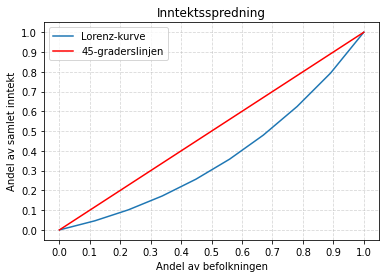

(None, None)

In [492]:
semesteroppgave(SSB_QUERY,SSB_URL)

#### 4.8 Videre testing 

Tester funksjonen med forskjellige inntektstall. For eksempel:

- 06944: Inntekt for husholdninger, etter region, statistikkvariabel, år og husholdningstype <br>
- Høyeste verdi i desil (kr) <br>
- Inntekt etter skatt median <br>
- 2019 <br>
- Alle kommuner <br>
- Alle husholdninger

In [493]:
SSB_URL = 'https://data.ssb.no/api/v0/no/table/06944/'

SSB_QUERY = {
  "query": [
    {
      "code": "Region",
      "selection": {
        "filter": "vs:Kommune",
        "values": [
          "3001",          "3002",          "3003",          "3004",          "3005",          "3006",          "3007",
          "3011",          "3012",          "3013",          "3014",          "3015",          "3016",          "3017",
          "3018",          "3019",          "3020",          "3021",          "3022",          "3023",          "3024",          "3025",
          "3026",          "3027",          "3028",          "3029",          "3030",          "3031",          "3032",
          "3033",          "3034",          "3035",          "3036",          "3037",          "3038",          "3039",
          "3040",          "3041",          "3042",          "3043",          "3044",          "3045",          "3046",          "3047",
          "3048",          "3049",          "3050",          "3051",          "3052",          "3053",          "3054",          "0101",
          "0102",          "0103",          "0104",          "0105",          "0106",          "0111",          "0113",          "0114",
          "0115",          "0116",          "0117",          "0118",          "0119",          "0121",          "0122",          "0123",
          "0124",          "0125",          "0127",          "0128",          "0130",          "0131",          "0133",          "0134",
          "0135",          "0136",          "0137",          "0138",          "0199",          "0211",          "0213",          "0214",          "0215",          "0216",
          "0217",          "0219",          "0220",          "0221",          "0226",          "0227",          "0228",          "0229",
          "0230",          "0231",          "0233",          "0234",          "0235",          "0236",          "0237",          "0238",
          "0239",          "0299",          "0601",          "0602",          "0604",          "0605",          "0612",          "0615",
          "0616",          "0617",          "0618",          "0619",          "0620",          "0621",          "0622",          "0623",
          "0624",          "0625",          "0626",          "0627",          "0628",          "0631",          "0632",          "0633",
          "0699",          "0301",          "0399",          "3401",          "3403",          "3405",          "3407",          "3411",
          "3412",          "3413",          "3414",          "3415",          "3416",          "3417",          "3418",          "3419",
          "3420",          "3421",          "3422",          "3423",          "3424",          "3425",          "3426",          "3427",
          "3428",          "3429",          "3430",          "3431",          "3432",          "3433",          "3434",          "3435",
          "3436",          "3437",          "3438",          "3439",          "3440",          "3441",          "3442",          "3443",
          "3446",          "3447",          "3448",          "3449",          "3450",          "3451",          "3452",          "3453",
          "3454",          "0401",          "0402",          "0403",          "0412",          "0414",          "0415",          "0417",
          "0418",          "0419",          "0420",          "0423",          "0425",          "0426",          "0427",          "0428",
          "0429",          "0430",          "0432",          "0434",          "0435",          "0436",          "0437",          "0438",
          "0439",          "0441",          "0499",          "0501",          "0502",          "0511",          "0512",          "0513",
          "0514",          "0515",          "0516",          "0517",          "0518",          "0519",          "0520",          "0521",
          "0522",          "0528",          "0529",          "0532",          "0533",          "0534",          "0536",          "0538",
          "0540",          "0541",          "0542",          "0543",          "0544",          "0545",          "0599",          "3801",
          "3802",          "3803",          "3804",          "3805",          "3806",          "3807",          "3808",          "3811",
          "3812",          "3813",          "3814",          "3815",          "3816",          "3817",          "3818",          "3819",
          "3820",          "3821",          "3822",          "3823",          "3824",          "3825",          "0701",          "0702",
          "0703",          "0704",          "0705",          "0706",          "0707",          "0708",          "0709",          "0710",
          "0711",          "0712",          "0713",          "0714",          "0715",          "0716",          "0716u",          "0717",
          "0718",          "0719",          "0720",          "0721",          "0722",          "0723",          "0724",          "0725",
          "0726",          "0727",          "0728",          "0729",          "0799",          "0805",          "0806",          "0807",
          "0811",          "0814",          "0815",          "0817",          "0819",          "0821",          "0822",          "0826",
          "0827",          "0828",          "0829",          "0830",          "0831",          "0833",          "0834",          "0899",
          "4201",          "4202",          "4203",          "4204",          "4205",          "4206",          "4207",          "4211",
          "4212",          "4213",          "4214",          "4215",          "4216",          "4217",          "4218",          "4219",
          "4220",          "4221",          "4222",          "4223",         "4224",          "4225",          "4226",          "4227",
          "4228",          "0901",          "0903",          "0904",          "0906",          "0911",          "0912",          "0914",
          "0918",          "0919",          "0920",          "0921",          "0922",          "0923",          "0924",          "0926",
          "0928",          "0929",          "0932",          "0933",          "0935",          "0937",          "0938",          "0940",
          "0941",          "0999",          "1001",          "1002",          "1003",          "1004",          "1014",          "1017",
          "1018",          "1021",          "1026",          "1027",          "1029",          "1032",          "1034",          "1037",
          "1046",          "1099",          "1101",          "1102",          "1103",          "1106",          "1108",          "1111",
          "1112",          "1114",          "1119",          "1120",          "1121",          "1122",          "1124",          "1127",
          "1129",          "1130",          "1133",          "1134",          "1135",          "1141",          "1142",          "1144",
          "1145",          "1146",          "1149",          "1151",          "1154",          "1159",          "1160",          "1199",
          "4601",          "4602",          "4611",          "4612",          "4613",          "4614",          "4615",          "4616",
          "4617",          "4618",          "4619",          "4620",          "4621",          "4622",          "4623",          "4624",
          "4625",          "4626",          "4627",          "4628",          "4629",          "4630",          "4631",          "4632",
          "4633",          "4634",          "4635",          "4636",          "4637",          "4638",          "4639",          "4640",
          "4641",          "4642",          "4643",          "4644",          "4645",          "4646",          "4647",          "4648",
          "4649",          "4650",          "4651",          "1201",          "1211",          "1214",          "1216",          "1219",
          "1221",          "1222",          "1223",          "1224",          "1227",          "1228",          "1230",          "1231",
          "1232",          "1233",          "1234",          "1235",          "1238",          "1241",          "1242",          "1243",
          "1244",          "1245",          "1246",          "1247",          "1248",          "1249",          "1250",          "1251",
          "1252",          "1253",          "1255",          "1256",          "1259",          "1260",          "1263",          "1264",
          "1265",          "1266",          "1299",          "1301",          "1401",          "1411",          "1412",          "1413",
          "1416",          "1417",          "1418",          "1419",          "1420",          "1421",          "1422",          "1424",
          "1426",          "1428",          "1429",          "1430",          "1431",          "1432",          "1433",          "1438",
          "1439",          "1441",          "1443",          "1444",          "1445",          "1448",          "1449",          "1499",
          "1501",          "1502",          "1503",          "1504",          "1505",          "1506",          "1507",          "1511",
          "1514",          "1515",          "1516",          "1517",          "1519",          "1520",          "1523",          "1524",
          "1525",          "1526",          "1527",          "1528",          "1529",          "1531",          "1532",          "1534",
          "1535",          "1539",          "1543",          "1545",          "1546",          "1547",          "1548",          "1551",
          "1554",          "1556",          "1557",          "1560",          "1563",          "1566",          "1567",          "1569",
          "1571",          "1572",          "1573",          "1576",          "1577",          "1578",          "1579",          "1599",
          "5001",          "5004",          "5005",          "5006",          "5007",          "5011",          "5012",          "5013",
          "5014",          "5015",          "5016",          "5017",          "5018",          "5019",          "5020",          "5021",
          "5022",          "5023",          "5024",          "5025",          "5026",          "5027",          "5028",          "5029",
          "5030",          "5031",          "5032",          "5033",          "5034",          "5035",          "5036",          "5037",
          "5038",          "5039",          "5040",          "5041",          "5042",          "5043",          "5044",          "5045",
          "5046",          "5047",          "5048",          "5049",          "5050",          "5051",          "5052",          "5053",
          "5054",          "5055",          "5056",          "5057",          "5058",          "5059",          "5060",          "5061",
          "1601",          "1612",          "1613",          "1617",          "1620",          "1621",          "1622",          "1624",
          "1627",          "1630",          "1632",          "1633",          "1634",          "1635",          "1636",          "1638",
          "1640",          "1644",          "1645",          "1648",          "1653",          "1657",          "1662",          "1663",
          "1664",          "1665",          "1699",          "1702",          "1703",          "1711",          "1714",          "1717",
          "1718",          "1719",          "1721",          "1723",          "1724",          "1725",          "1729",          "1736",
          "1738",          "1739",          "1740",          "1742",          "1743",          "1744",          "1748",          "1749",
          "1750",          "1751",          "1755",          "1756",          "1799",          "1804",          "1805",          "1806",
          "1811",          "1812",          "1813",          "1814",          "1815",          "1816",          "1818",          "1820",
          "1822",          "1824",          "1825",          "1826",          "1827",          "1828",          "1832",          "1833",
          "1834",          "1835",          "1836",          "1837",          "1838",          "1839",          "1840",          "1841",
          "1842",          "1843",          "1845",          "1848",          "1849",          "1850",          "1851",          "1852",
          "1853",          "1854",          "1855",          "1856",          "1857",          "1858",          "1859",          "1860",
          "1865",          "1866",          "1867",          "1868",          "1870",          "1871",          "1874",          "1875",
          "1899",          "5401",          "5402",          "5403",          "5404",          "5405",          "5406",          "5411",
          "5412",          "5413",          "5414",          "5415",          "5416",          "5417",          "5418",          "5419",
          "5420",          "5421",          "5422",          "5423",          "5424",          "5425",          "5426",          "5427",
          "5428",          "5429",          "5430",          "5432",          "5433",          "5434",          "5435",          "5436",
          "5437",          "5438",          "5439",          "5440",          "5441",          "5442",          "5443",          "5444",
          "1901",          "1902",          "1903",          "1911",          "1913",          "1915",          "1917",          "1919",
          "1920",          "1921",          "1922",          "1923",          "1924",          "1925",          "1926",          "1927",
          "1928",          "1929",          "1931",          "1933",          "1936",          "1938",          "1939",          "1940",
          "1941",          "1942",          "1943",          "1999",          "2001",          "2002",          "2003",          "2004",
          "2011",          "2012",          "2014",          "2015",          "2016",          "2017",          "2018",          "2019",
          "2020",          "2021",          "2022",          "2023",          "2024",          "2025",          "2027",          "2028",
          "2030",          "2099",          "2111",          "2112",          "2115",          "2121",          "2131",          "2199",
          "2211",          "2299",          "2300",          "2311",          "2321",          "2399",          "2599",          "9999"
        ]
      }
    },
    {
      "code": "HusholdType",
      "selection": {
        "filter": "item",
        "values": [
          "0000"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "InntSkatt"
        ]
      }
    },
    {
      "code": "Tid",
      "selection": {
        "filter": "item",
        "values": [
          "2019"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

Gini-koeffisienten: 0.04872282330140798


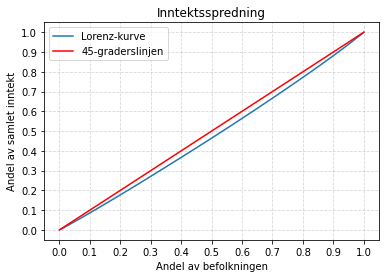

(None, None)

In [494]:
semesteroppgave(SSB_QUERY,SSB_URL)

En Gini-indeks på 4,9 prosent angir stor grad av inntektslikhet og innebærer at forventet forskjell i inntekt mellom to tilfeldig valgte inntektsmottakere tilsvarer 9,8 prosent av gjennomsnittsinntekten.  Siden dette eksempelet er basert på median inntekt etter skatt aggregert per kommune vil denne Lorenz-kurven trolig ligge nærmere 45-graderslinjen enn en Lorenz-kurve basert på disponibel inntekt per person eller husholdning i Norge (median tar hensyn til ekstremverdier).

#### 4.9 Gjør-det-selv

Lim inn din "SSB_QUERY" kildekode etter likhetstegnet, fjern hashtaggen og kjør koden:

In [ ]:
# SSB_QUERY = 

Lim inn URL-adressen til ditt datasett, fjern hashtaggen og kjør koden:

In [ ]:
# SSB_URL = 

Test funksjonen!

In [ ]:
# semesteroppgave(SSB_QUERY,SSB_URL)

#### 4.10 Bonus funksjon

Følgende funksjon bruker datasett lagret lokalt i excel format. Excel-filen skal ligge i samme katalog som denne json filen for at dette skal fungere. Denne funksjonen skiller seg vesentlig fra den forrige blant annet ved at den har en "if/else statement" som skjelner mellom excel filer med 2 kolonner (region og inntekt) og 3 kolonner (ekstra 'desil' kolonne). SSB sin API tar automatisk hensyn til slike endringer og formaterer datasettet for deg.

In [495]:
def semesteroppgave_excel(excel_file_name):
    """
    Følgende funksjon henter inntektstall fra SSB lagret lokalt i Excel format, 
    bearbeider og klargjør datasettet til analyse, finner Lorenz-kurven, 
    plotter den og finner Gini-koeffisienten
    """
    df = pd.read_excel(excel_file_name,na_values='.',keep_default_na=False,
                  na_filter = True, skiprows = 5, skipfooter=55, header=None)
    if len(df.columns) > 2:
        df.set_axis(['Kommune', 'Desi', 'Inntekt'], axis=1, inplace=True)
    else:
        df.set_axis(['Kommune', 'Inntekt'], axis=1, inplace=True)
    df['Inntekt'].replace('',np.nan,inplace=True)
    df['Inntekt'].replace(':',np.nan,inplace=True)
    df['Inntekt'] = df['Inntekt'].replace(0, np.nan)
    df.dropna(inplace=True)
    df=df.astype({'Inntekt':int,'Kommune':str})
    df['Kommune'] = df['Kommune'].apply(lambda x:x.split('(') [0])
    n = len(df)
    andel_av_befolkningen = np.arange(1, n+1) / n
    inntekter = df['Inntekt'].sort_values()
    andel_av_samlet_inntekt = inntekter / inntekter.sum()
    kumulativ_andel = andel_av_samlet_inntekt.cumsum()
    f,ax = plt.subplots()
    ax.plot(andel_av_befolkningen,kumulativ_andel, label='Lorenz-kurve')
    ax.set_title("Inntektsspredning")
    ax.plot((0,1), (0,1), color='r',label='45-graderslinjen')
    ax.set_xlabel('Andel av befolkningen')
    ax.set_ylabel('Andel av samlet inntekt')
    ax.grid(alpha=0.5, linestyle='--')
    ax.xaxis.set_major_locator(plt.MaxNLocator(12))
    ax.yaxis.set_major_locator(plt.MaxNLocator(12))
    ax.legend()
    kumulativ_andel_array = np.array(kumulativ_andel,dtype=np.float64)
    parvis_addisjon = [sum(kumulativ_andel_array[i:i+2]) for i in range(0,len(kumulativ_andel_array),1)]
    parvis_addisjon = np.array(parvis_addisjon,dtype=np.float64)
    areal_under_lorenz = sum((parvis_addisjon/2)*(1/len(parvis_addisjon)))
    areal_a = 0.5 - areal_under_lorenz
    gini = areal_a/0.5
    gini = print("Gini-koeffisienten:",gini)
    return(gini,plt.show())

Tester funksjonen:

Gini-koeffisienten: 0.26593831140424684


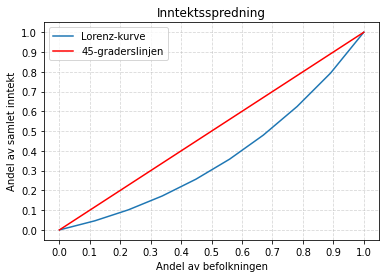

(None, None)

In [496]:
semesteroppgave_excel('Excel_1.xlsx')

Gini-koeffisienten: 0.04872282330140798


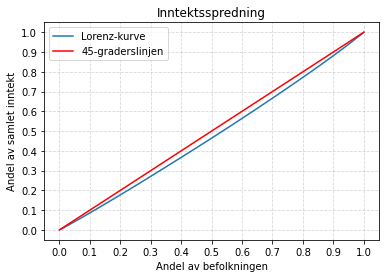

(None, None)

In [497]:
semesteroppgave_excel('Excel_2.xlsx')

#### 5. Konklusjon

Jeg har bruk det jeg har lært i dette kurset til å automatisere et problem, hente inn datamateriale og fremstille det grafisk. Ideelt sett skal funksjonen fungere på alle typer inntektstall fra SSB og det ville vært interessant å se om dette stemmer i praksis (dette er dog litt tidskrevende å teste). Min funksjon er neppe perfekt men danner et godt utgangspunkt for videre arbeid! Jeg understreker at formålet med prosjektet var å vise frem grunnleggende ferdigheter i Python-programmering i en samfunnsøkonomisk kontekst.

#### Referanseliste

CORE. (2017). 5.12 Measuring economic inequality [Nettside]. Hentet 10. september 2021 fra  <br>
https://www.core-econ.org/the-economy/book/text/05.html#512-measuring-economic-inequality <br> <br>
Finansdepartementet. (2020). Meld. St. 1 – Nasjonalbudsjettet 2021. Hentet fra <br>
https://www.regjeringen.no/contentassets/53adf7ea24b54e4a961005443231fd08/no/pdfs/stm202020210001000dddpdfs.pdf <br><br>
Finansdepartementet. (2019). Meld. St. 13 – Muligheter for alle. Hentet fra <br>
https://www.regjeringen.no/contentassets/472d31ff815d4ce7909f5593bf7d79b8/no/pdfs/stm201820190013000dddpdfs.pdf <br><br>
Anonym. (2021). SOK-1004 - Mappeoppgave 1 [Upublisert rapport]. UiT.